In [1]:
#importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

# Load the data
file_path = '/Users/rahulvispute/Desktop/SEM 3/623 final/BTC-USD.csv'  # Update the path as needed
btc_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and add new features
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data['Day_of_Week'] = btc_data['Date'].dt.dayofweek
btc_data['%Change_Open_Close'] = ((btc_data['Close'] - btc_data['Open']) / btc_data['Open']) * 100
btc_data['Daily_Range'] = btc_data['High'] - btc_data['Low']
btc_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_Week,%Change_Open_Close,Daily_Range
0,2019-04-19,5298.154297,5336.680176,5233.334961,5303.812500,5303.812500,1.378024e+10,4,0.106796,103.345215
1,2019-04-20,5304.160645,5358.490723,5295.877930,5337.886230,5337.886230,1.316965e+10,5,0.635833,62.612793
2,2019-04-21,5335.878906,5359.924805,5257.339355,5314.531250,5314.531250,1.373184e+10,6,-0.400078,102.585450
3,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,1.460163e+10,0,1.635213,142.410645
4,2019-04-23,5399.365723,5633.802246,5389.408691,5572.362305,5572.362305,1.586731e+10,1,3.204017,244.393555
5,2019-04-24,5571.508301,5642.044434,5418.263184,5464.866699,5464.866699,1.704803e+10,2,-1.914053,223.781250
6,2019-04-25,5466.524414,5542.238281,5181.338867,5210.515625,5210.515625,1.533028e+10,3,-4.683209,360.899414
7,2019-04-26,5210.304688,5383.634277,5177.368652,5279.348145,5279.348145,1.681211e+10,4,1.325133,206.265625
8,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016,5268.291016,1.311127e+10,5,-0.211767,77.114258
9,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160,5285.139160,1.281999e+10,6,0.254044,70.548340


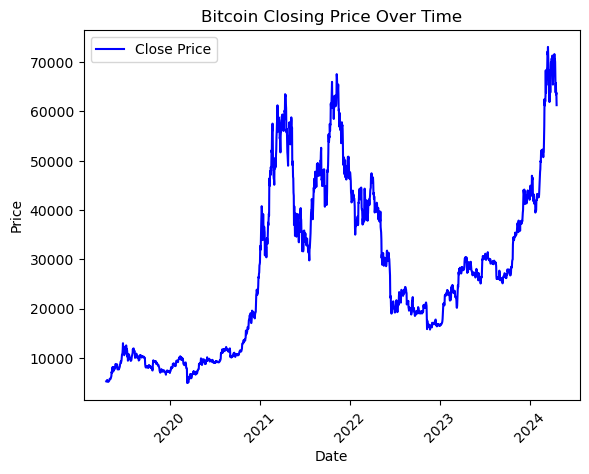

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# btc_data is our DataFrame with 'Date' and 'Close' columns
# Make sure 'Date' is in datetime format and set as the index
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Plotting using plt.plot directly with DataFrame columns
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price Over Time')
plt.legend()
plt.xticks(rotation=45)  
plt.show()


In [3]:
# Drop rows with missing values
btc_data_cleaned = btc_data.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Day_of_Week', '%Change_Open_Close', 'Daily_Range']
target = 'Close'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(btc_data_cleaned[features], btc_data_cleaned[target], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 140930.16768062525
R^2 Score: 0.9995340383638487


Results of Dickey-Fuller Test:
Test Statistic                   -1.512605
p-value                           0.527267
#Lags Used                       12.000000
Number of Observations Used    1815.000000
Critical Value (1%)              -3.433958
Critical Value (5%)              -2.863134
Critical Value (10%)             -2.567618
dtype: float64


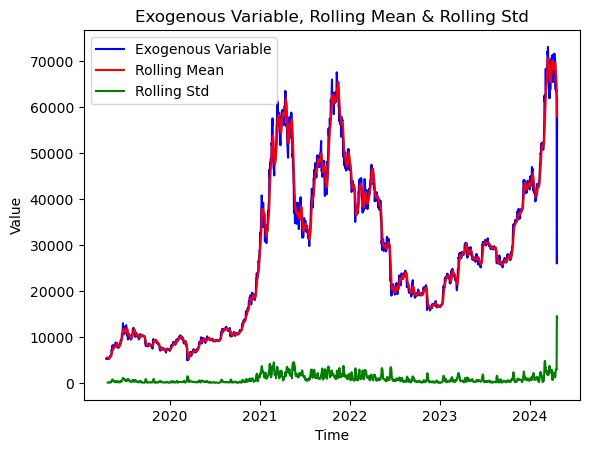

In [4]:
from statsmodels.tsa.stattools import adfuller
# Assuming 'Close' is the column containing your exogenous variable
exog_data = btc_data['Close']

def test_for_stationary(exog_data):
    # Check for NaN and Inf values
    if exog_data.isnull().values.any() or np.isinf(exog_data).any():
        # Replace NaN and Inf values with median (or any other suitable method)
        exog_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        exog_data.fillna(exog_data.median(), inplace=True)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(exog_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    # Plotting rolling mean and rolling standard deviation
    r_mean = exog_data.rolling(window=7, center=False).mean()
    r_std = exog_data.rolling(window=7, center=False).std()
    
    plt.plot(exog_data, color='blue', label='Exogenous Variable')
    plt.plot(r_mean, color='red', label='Rolling Mean')
    plt.plot(r_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Exogenous Variable, Rolling Mean & Rolling Std')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

# Call the function with the exog_data
test_for_stationary(exog_data)


### The test statistic (-1.512605) is greater than the critical values at all levels of significance,
### and the p-value (0.527267) is high, suggesting that the data is likely non-stationary.
### The above series show that rolling mean value varies with time and is not stationary.
### The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series 
### to make it stationary
<body>
    <h3>The rolling mean and rolling standard deviation are calculated over a window of 7 time periods using the rolling method. These plots help visualize trends and fluctuations in the data over time.</h3>
</body>

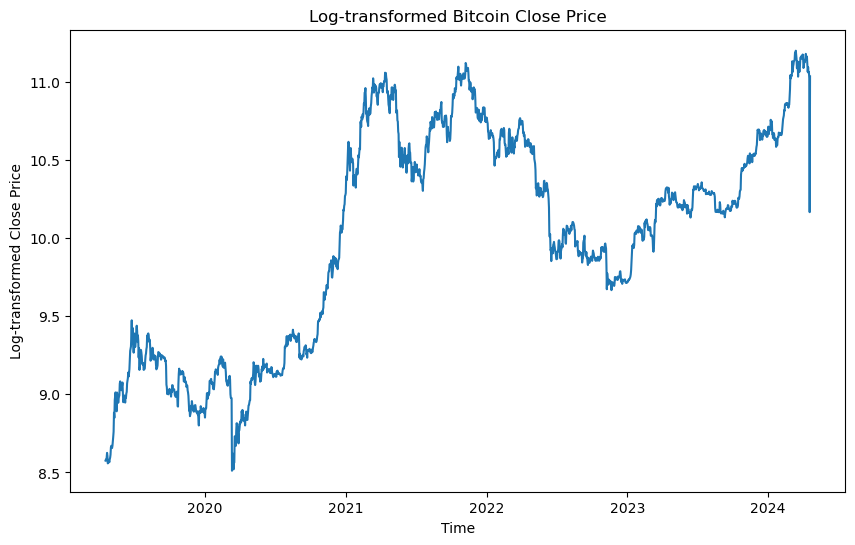

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Log transform the data
ts_logtransformed = np.log(btc_data['Close'])
ts_logtransformed.index = pd.to_datetime(ts_logtransformed.index)

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the data
plt.plot(ts_logtransformed.index,ts_logtransformed)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Log-transformed Close Price')
plt.title('Log-transformed Bitcoin Close Price')

# Show plot
plt.show()

In [6]:
ts_logtransformed.head(10)

Date
2019-04-19    8.576181
2019-04-20    8.582585
2019-04-21    8.578200
2019-04-22    8.594037
2019-04-23    8.625574
2019-04-24    8.606095
2019-04-25    8.558434
2019-04-26    8.571558
2019-04-27    8.569461
2019-04-28    8.572654
Name: Close, dtype: float64

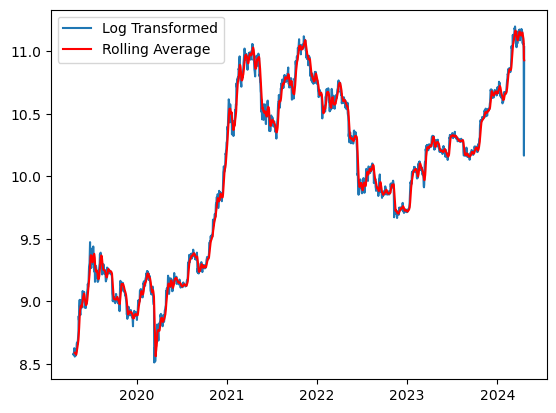

In [7]:
# Smoothing by Rolling Average

Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed.index,ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

### The red line shows the rolling average.Since we are taking average of last 7 values, rolling mean is not defined for first 7 values. This can be observed as:

In [8]:
Rolling_average.head(10)

Date
2019-04-19         NaN
2019-04-20         NaN
2019-04-21         NaN
2019-04-22         NaN
2019-04-23         NaN
2019-04-24         NaN
2019-04-25    8.588729
2019-04-26    8.588069
2019-04-27    8.586194
2019-04-28    8.585402
Name: Close, dtype: float64

### Lets subtract this Rolling average from the original log transformed series


In [9]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2024-04-10    0.016782
2024-04-11    0.006084
2024-04-12   -0.034307
2024-04-13   -0.074899
2024-04-14   -0.037635
2024-04-15   -0.056066
2024-04-16   -0.038550
2024-04-17   -0.058881
2024-04-18   -0.774296
2024-04-19    0.105992
Name: Close, dtype: float64

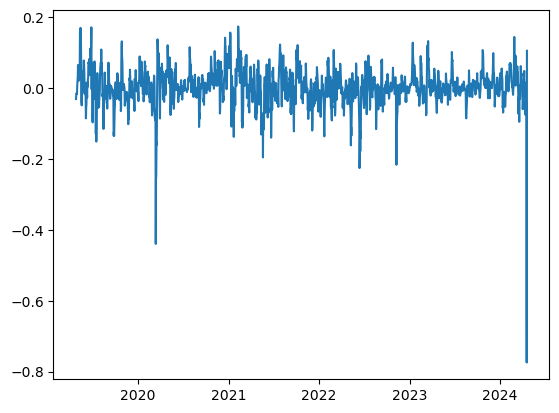

In [10]:
log_Rolling_difference.dropna(inplace=True) # drop missing values
plt.plot(log_Rolling_difference)

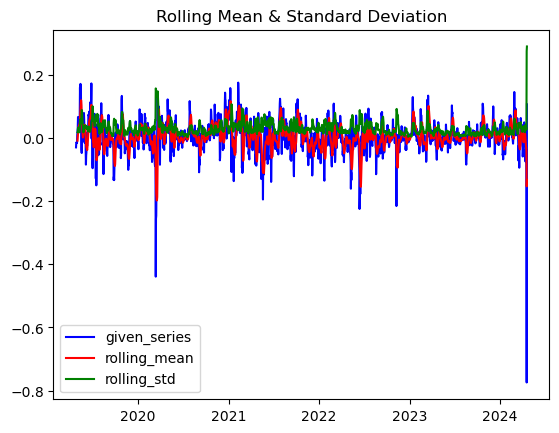

Results of Dickey-Fuller Test:
Test Statistic                -1.306709e+01
p-value                        1.992023e-24
#Lags Used                     6.000000e+00
Number of Observations Used    1.815000e+03
Critical Value (1%)           -3.433958e+00
Critical Value (5%)           -2.863134e+00
Critical Value (10%)          -2.567618e+00
dtype: float64


In [11]:
def test_for_stationary(input_data, label=None):
    r_mean = input_data.rolling(window=7, center=False).mean()
    r_std = input_data.rolling(window=7, center=False).std()
    
    # Plotting the data
    plt.plot(input_data, color='blue', label=label)  # Use label parameter for legend
    plt.plot(r_mean, color='red')
    plt.plot(r_std, color='green')
    
    # Customize legend
    if label:
        plt.legend([label, 'rolling_mean', 'rolling_std'], loc='best')
    else:
        plt.legend(['given_series', 'rolling_mean', 'rolling_std'], loc='best')
    
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    
    
test_for_stationary(log_Rolling_difference)

<body>
    <h3>The test statistic is significantly lower than the critical values at various confidence levels.
        Therefore, we can conclude that the time series data is likely stationary</h3>
</body>

### <u>We can use exponential_weighted_moving_average instead of moving average to improve the solution<u>

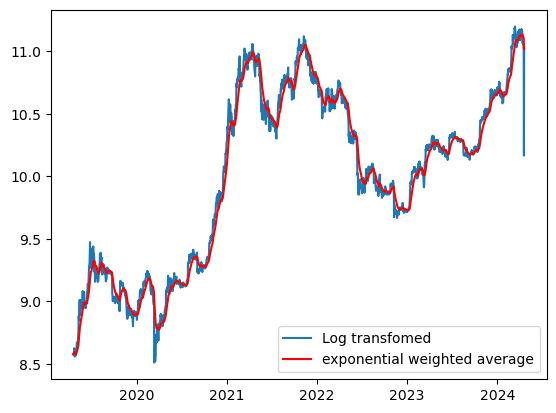

In [12]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [13]:
expwighted_avg.head(10)

Date
2019-04-19    8.576181
2019-04-20    8.579541
2019-04-21    8.579049
2019-04-22    8.583370
2019-04-23    8.593559
2019-04-24    8.596197
2019-04-25    8.589077
2019-04-26    8.586058
2019-04-27    8.583406
2019-04-28    8.581793
Name: Close, dtype: float64

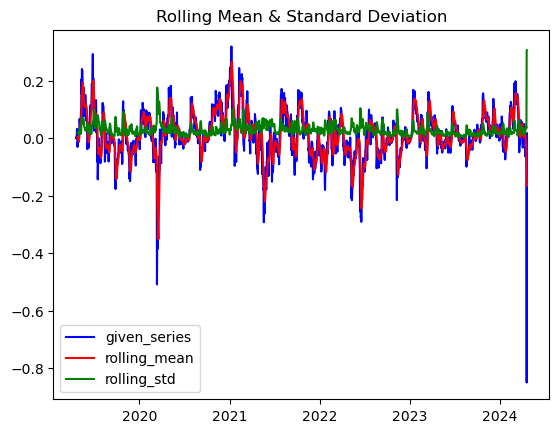

Results of Dickey-Fuller Test:
Test Statistic                -8.427677e+00
p-value                        1.907266e-13
#Lags Used                     1.000000e+00
Number of Observations Used    1.826000e+03
Critical Value (1%)           -3.433936e+00
Critical Value (5%)           -2.863124e+00
Critical Value (10%)          -2.567613e+00
dtype: float64


In [14]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

### Now the current time series is stationary, the TS (test_statistic) value is less than 1% critcal value. 
### Since weights are assigned to values from the starting index. Therefore the test works

<h1><u>Seasonality Adjustment by Differencing</u> 
<body>
    <h3> Seasonal components in a Time series can be eliminated by using differencing. If there is a seasonal component at level of one month, then it can be removed on an observation today by substracting the value from last month. We can substract last months data to the presents (giving a gap of 30 days) and first months data would 
 not be available for modeling. I am trying to difference different types of seasonality and test for stationarized data</h3>
    </body>

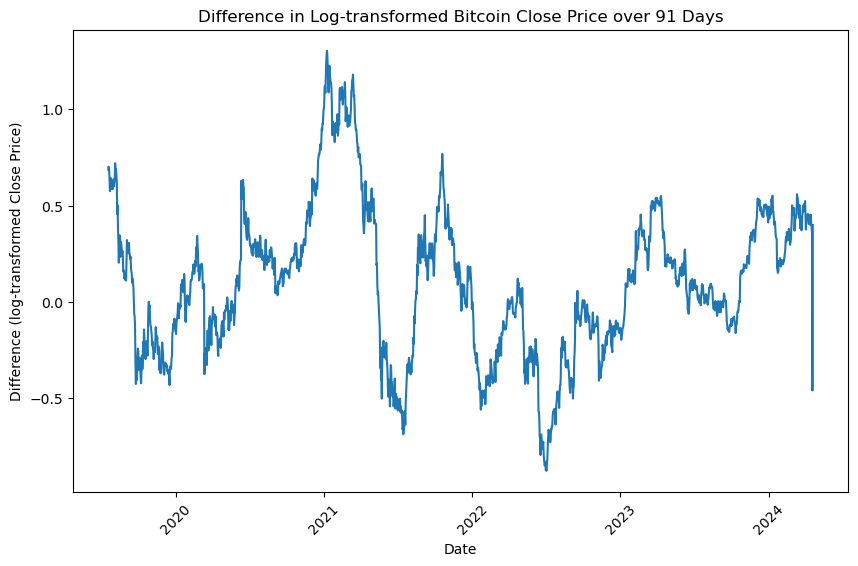

In [15]:
# Assuming ts_logtransformed is your pandas Series with log-transformed data
ts_logtransformed = np.log(btc_data['Close'])

# Calculate differences
days_in_quarter = 91
diff = ts_logtransformed.diff(periods=days_in_quarter)

# Set the index of diff to be the same as ts_logtransformed
diff.index = ts_logtransformed.index

# Plotting with dates on the x-axis
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
plt.plot(diff.index, diff)
plt.xlabel('Date')
plt.ylabel('Difference (log-transformed Close Price)')
plt.title('Difference in Log-transformed Bitcoin Close Price over 91 Days')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Date
2019-04-19         NaN
2019-04-20         NaN
2019-04-21         NaN
2019-04-22         NaN
2019-04-23         NaN
2019-04-24         NaN
2019-04-25         NaN
2019-04-26   -0.004623
2019-04-27   -0.013124
2019-04-28   -0.005546
Name: Close, dtype: float64

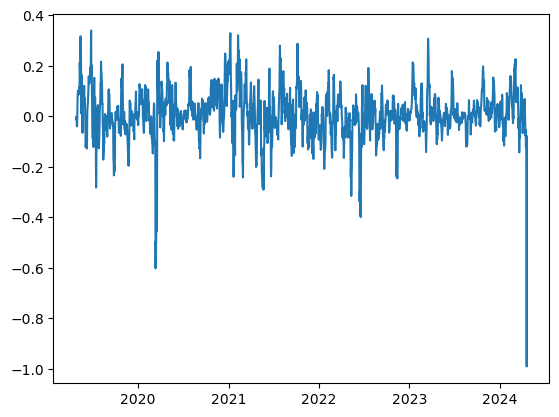

In [16]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

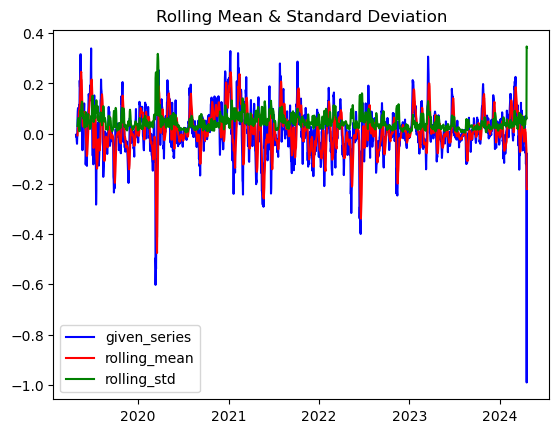

Results of Dickey-Fuller Test:
Test Statistic                -7.191987e+00
p-value                        2.489893e-10
#Lags Used                     2.500000e+01
Number of Observations Used    1.795000e+03
Critical Value (1%)           -3.433998e+00
Critical Value (5%)           -2.863152e+00
Critical Value (10%)          -2.567628e+00
dtype: float64


In [17]:
def test_for_stationary(input_data, label=None):
    r_mean = input_data.rolling(window=7, center=False).mean()
    r_std = input_data.rolling(window=7, center=False).std()
    
    # Plotting the data
    plt.plot(input_data, color='blue', label=label)  # Use label parameter for legend
    plt.plot(r_mean, color='red')
    plt.plot(r_std, color='green')
    
    # Customize legend
    if label:
        plt.legend([label, 'rolling_mean', 'rolling_std'], loc='best')
    else:
        plt.legend(['given_series', 'rolling_mean', 'rolling_std'], loc='best')
    
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)


<h2> The Dickey-Fuller test statistics is significantly lower than the critical values at various confidence levels.Therefore, we can conclude that the time series data is stationary with 99% confidence</h2>

# <U> DECOMPOSING 

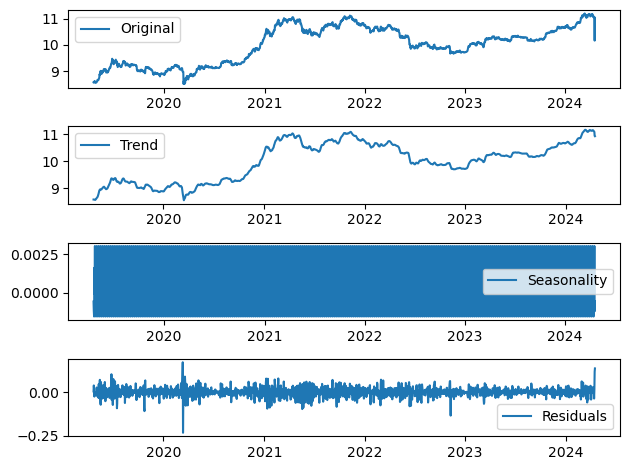

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_logtransformed)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


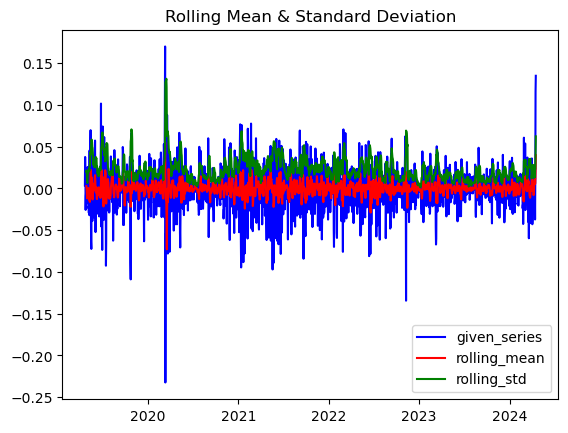

Results of Dickey-Fuller Test:
Test Statistic                -1.397091e+01
p-value                        4.347045e-26
#Lags Used                     2.400000e+01
Number of Observations Used    1.797000e+03
Critical Value (1%)           -3.433994e+00
Critical Value (5%)           -2.863150e+00
Critical Value (10%)          -2.567627e+00
dtype: float64


In [19]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

# <u> FORECASTING

<h3>
Autocorrelation (ACF) measures the correlation between a time series and its lagged values. It helps identify the order of the MA (Moving Average) component in an ARIMA model.

Partial Autocorrelation (PACF) measures the correlation between a time series and its lagged values while controlling for the effect of intermediate lags. It helps identify the order of the AR (Autoregressive) component in an ARIMA model.

Computing and plotting these functions are essential steps in determining the parameters (p, d, q) of an ARIMA model for time series forecasting.</h3>

In [20]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# ACF and PACF plots
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ywm') #Yule-Walker method


Text(0.5, 1.0, 'Autocorrelation Function')

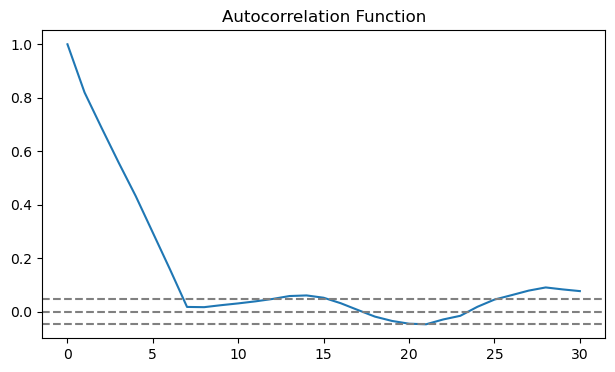

In [21]:
plt.figure(figsize=(16, 4))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


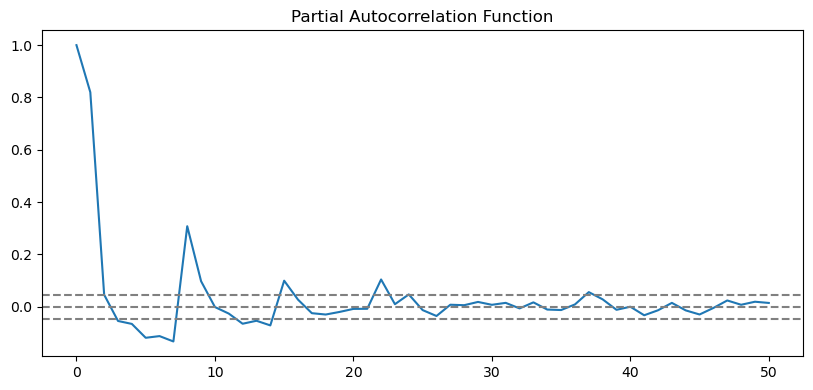

In [22]:
plt.figure(figsize=(16, 4))  # Adjust width and height as needed

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


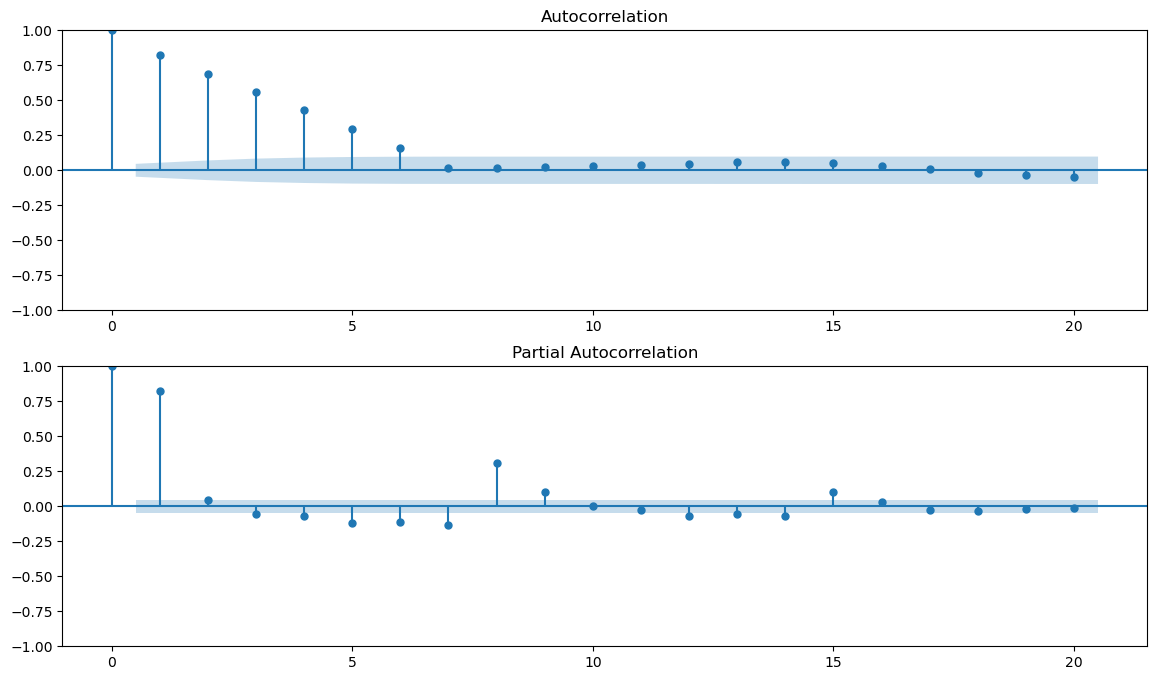

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(14,8))
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=20)
pyplot.show()

## <p>The ACF shows a gradual decline, which indicates a strong autocorrelation at lag 0 that gradually tapers off. This pattern suggests that the data may be well-modeled by a moving average (MA)</p> 
<p>The PACF has a sharp cut-off after the first lag. This is indicative of an autoregressive (AR) component of order 1</p>
<p>In this plot, the two dotted lines on either side of 0 are the confidence intervals.
        <p>These can be used to determine the ‘p’ and ‘q’ values as: the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively.</p>
        <p><strong>p – The lag value where the PACF chart crosses the upper confidence interval for the first time.</strong></p>
        <p>If you notice closely, in this case p=2, The PACF shows a significant lag on day 2.</p>
        <p><strong>q – The lag value where the ACF chart crosses the upper confidence interval for the first time.</strong></p>
        <p>In this case q=2.</p>
       <p> We will try different orders of ARIMA models to identify the best order by deriving the residual sum of squares(RSS) for each model. Lower RSS are considered to be the best ones.</p>

In [24]:
from pmdarima import auto_arima

model_autoARIMA = auto_arima(ts_diff_logtrans, start_p=0, start_q=0,
                             test='adf',       # use adftest to find optimal 'd'
                             max_p=10, max_q=10, # maximum p and q
                             m=1,              # frequency of series
                             d=None,           # let model determine 'd'
                             seasonal=False,   # No Seasonality
                             start_P=0, 
                             D=0, 
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3273.847, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5317.615, Time=0.10 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4403.295, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5322.980, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-5332.023, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-5339.168, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-5365.018, Time=0.38 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=-5387.514, Time=0.14 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=-5417.611, Time=0.26 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=-5686.203, Time=0.21 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=-5701.018, Time=0.25 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=-5702.456, Time=0.33 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,1)(0,0,0)[0]             : AIC=-5699.768, Time=2.01 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,1)(0,0,0)[0]             : AIC=-5701.472, Time=1.69 sec
 ARIMA(10,0,0)(0,0,0)[0] intercept   : AIC=-5701.893, Time=2.21 sec

Best model:  ARIMA(10,0,0)(0,0,0)[0]          
Total fit time: 8.382 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1821
Model:              SARIMAX(10, 0, 0)   Log Likelihood                2862.228
Date:                Thu, 09 May 2024   AIC                          -5702.456
Time:                        08:26:35   BIC                          -5641.877
Sample:                    04-26-2019   HQIC                         -5680.107
                         - 04-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


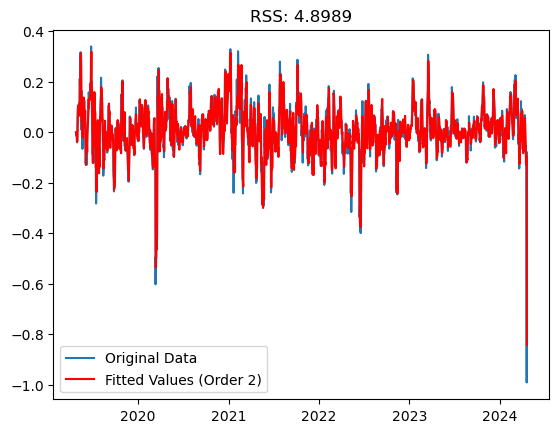

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1821
Model:                 ARIMA(7, 1, 0)   Log Likelihood                2801.874
Date:                Thu, 09 May 2024   AIC                          -5587.748
Time:                        08:26:36   BIC                          -5543.695
Sample:                    04-26-2019   HQIC                         -5571.495
                         - 04-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1563      0.006    -26.881      0.000      -0.168      -0.145
ar.L2         -0.0050      0.027     -0.187      0.851      -0.057       0.047
ar.L3          0.0166      0.025      0.666      0.5

In [25]:
# Initialize and fit the ARIMA model with frequency information
model = ARIMA(ts_diff_logtrans, order=(7,1, 0),freq='D')
results_AR = model.fit()

# Plot original data and fitted values
plt.plot(ts_diff_logtrans, label='Original Data')
plt.plot(results_AR.fittedvalues, color='red', label='Fitted Values (Order 2)')

# Calculate and display the sum of squared residuals (RSS)
RSS = results_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f' % sum(RSS**2))

# Add legend
plt.legend(loc='best')
plt.show()
print(results_AR.summary())


# MA model

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1821
Model:                 ARIMA(0, 1, 6)   Log Likelihood                2721.407
Date:                Thu, 09 May 2024   AIC                          -5428.814
Time:                        08:26:37   BIC                          -5390.268
Sample:                    04-26-2019   HQIC                         -5414.593
                         - 04-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7521      0.010    -73.303      0.000      -0.772      -0.732
ma.L2          0.3417      0.018     19.188      0.000       0.307       0.377
ma.L3         -0.0591      0.021     -2.825      0.0

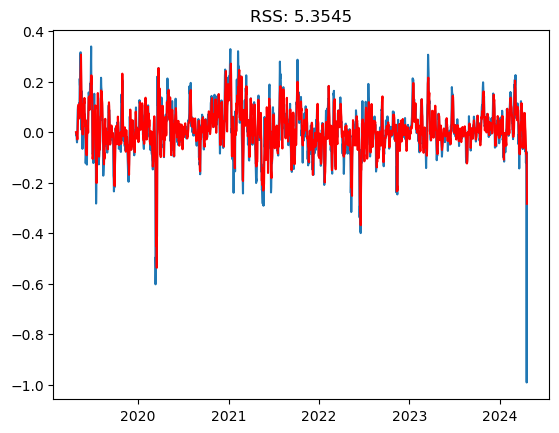

In [26]:
model = ARIMA(ts_diff_logtrans, order=(0,1,6),freq='D') 
results_MA = model.fit()  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
#model summary
print(results_MA.summary())

count    1821.000000
mean       -0.000666
std         0.054236
min        -0.898545
25%        -0.024199
50%        -0.000120
75%         0.026366
max         0.340163
dtype: float64


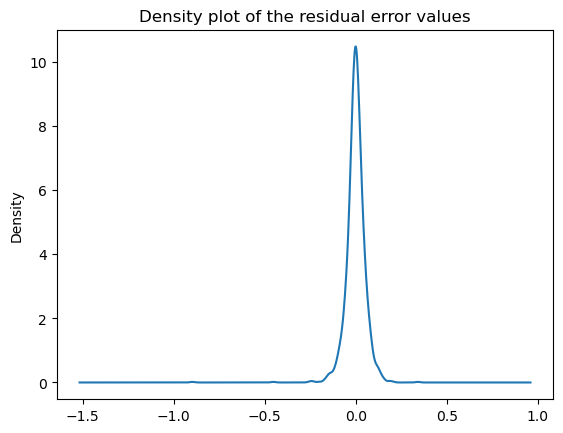

In [27]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

# ARIMA combined model

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1821
Model:                 ARIMA(7, 1, 6)   Log Likelihood                2940.471
Date:                Thu, 09 May 2024   AIC                          -5852.943
Time:                        08:26:40   BIC                          -5775.850
Sample:                    04-26-2019   HQIC                         -5824.501
                         - 04-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4521      0.038     11.850      0.000       0.377       0.527
ar.L2         -0.1009      0.060     -1.694      0.090      -0.218       0.016
ar.L3         -0.1571      0.056     -2.804      0.0

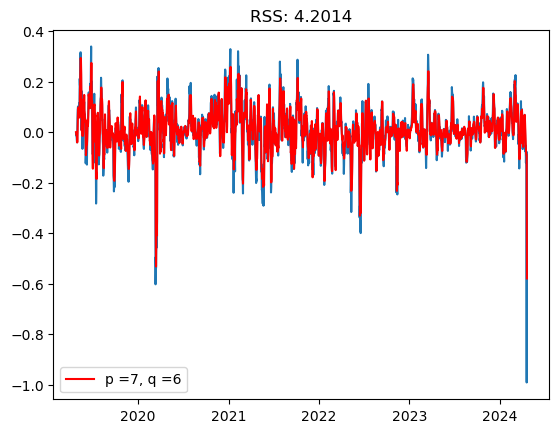

In [28]:
model = ARIMA(ts_diff_logtrans, order=(7, 1, 6))  
results_ARIMA = model.fit()  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =7, q =6')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')
print(results_ARIMA.summary())

<h2>This model seems to fit the data well based on the Log Likelihood and information criteria</h2>

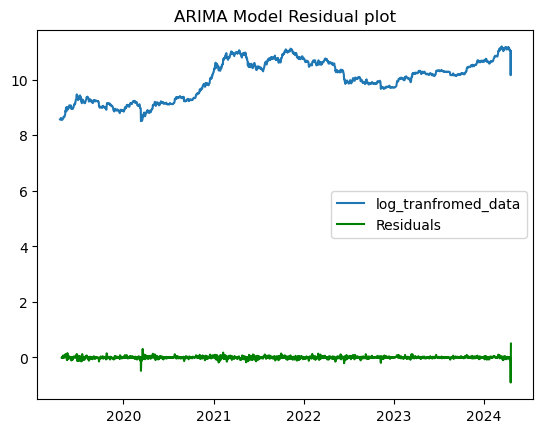

In [29]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1821.000000
mean       -0.000637
std         0.048042
min        -0.900207
25%        -0.019546
50%        -0.000311
75%         0.020184
max         0.498950
dtype: float64


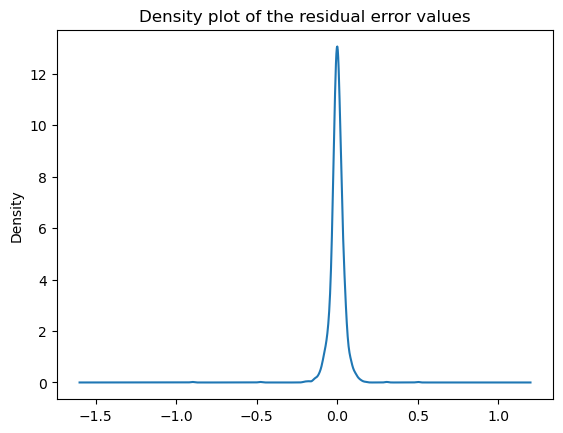

In [30]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

# Using Combined ARIMA model to predict and forecast

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2019-04-26    0.000000
2019-04-27   -0.004623
2019-04-28   -0.010575
2019-04-29   -0.008679
2019-04-30   -0.021540
dtype: float64


In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2019-04-26    0.000000
2019-04-27   -0.004623
2019-04-28   -0.015198
2019-04-29   -0.023877
2019-04-30   -0.045417
dtype: float64


In [33]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(1)

Date
2019-04-19    8.576181
dtype: float64

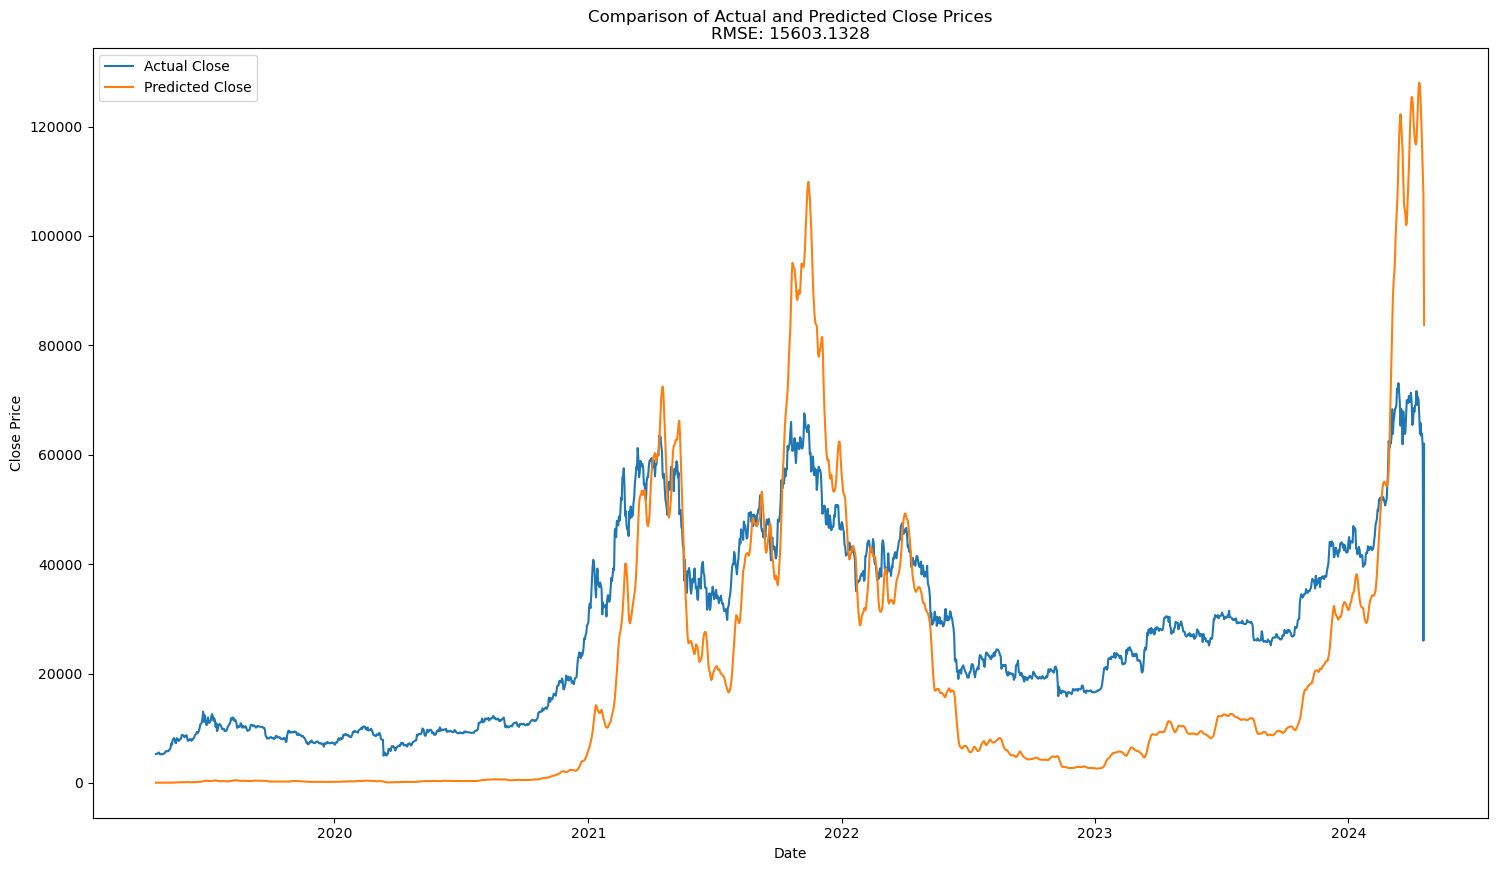

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictions_ARIMA_log is already defined as a pandas Series
predictions_ARIMA = np.power(1.5434, predictions_ARIMA_log)

# Create a larger figure
plt.figure(figsize=(18, 10))  # Adjust the width and height as needed

# Plotting
plt.plot(btc_data['Close'], label='Actual Close')
plt.plot(predictions_ARIMA, label='Predicted Close')

# Remove NaN values from btc_data_cleaned and predictions_ARIMA
btc_data_cleaned = btc_data['Close'].dropna()
predictions_ARIMA_cleaned = predictions_ARIMA[~np.isnan(predictions_ARIMA)]

# Calculate RMSE
rmse = np.sqrt(sum((predictions_ARIMA_cleaned - btc_data_cleaned)**2) / len(btc_data_cleaned))

# Add title, labels, and legend
plt.title('Comparison of Actual and Predicted Close Prices\nRMSE: %.4f' % rmse)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()


In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


# Define the dates for the forecast
dates = [pd.Timestamp('2024-04-20'), pd.Timestamp('2024-04-21'), pd.Timestamp('2024-04-22'),
         pd.Timestamp('2024-04-23'), pd.Timestamp('2024-04-24'), pd.Timestamp('2024-04-25'),
         pd.Timestamp('2024-04-26')]


# Generate forecast for the next 7 days
forecast_values = results_ARIMA.forecast(steps=7)

# Check if the forecast array has the correct length (7 elements)
forecast = pd.Series(np.exp(forecast_values), dates)
    
    # Calculate mean squared error (MSE) between forecast and test data
print(forecast)

2024-04-20    0.619867
2024-04-21    0.799538
2024-04-22    0.785504
2024-04-23    0.765106
2024-04-24    0.963144
2024-04-25    1.443100
2024-04-26    1.106065
Name: predicted_mean, dtype: float64


In [36]:
np.power(2653,forecast)

2024-04-20      132.514361
2024-04-21      546.272055
2024-04-22      489.058437
2024-04-23      416.410927
2024-04-24     1984.048571
2024-04-25    87255.698082
2024-04-26     6121.763562
Name: predicted_mean, dtype: float64

In [37]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the dates for the forecast
start_date = pd.Timestamp('2024-04-20')
end_date = start_date + pd.DateOffset(days=365)  # Forecast for the next 1 year

dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate forecast for the next 1 year (365 days)
forecast_values = results_ARIMA.forecast(steps=720)

# Check if the forecast array has the correct length (365 elements)
forecast = pd.Series(np.exp(forecast_values), index = dates)

# Print or use the forecast for analysis
print(forecast)


2024-04-20    0.619867
2024-04-21    0.799538
2024-04-22    0.785504
2024-04-23    0.765106
2024-04-24    0.963144
                ...   
2025-04-16    1.004844
2025-04-17    1.004843
2025-04-18    1.004844
2025-04-19    1.004843
2025-04-20    1.004844
Freq: D, Name: predicted_mean, Length: 366, dtype: float64


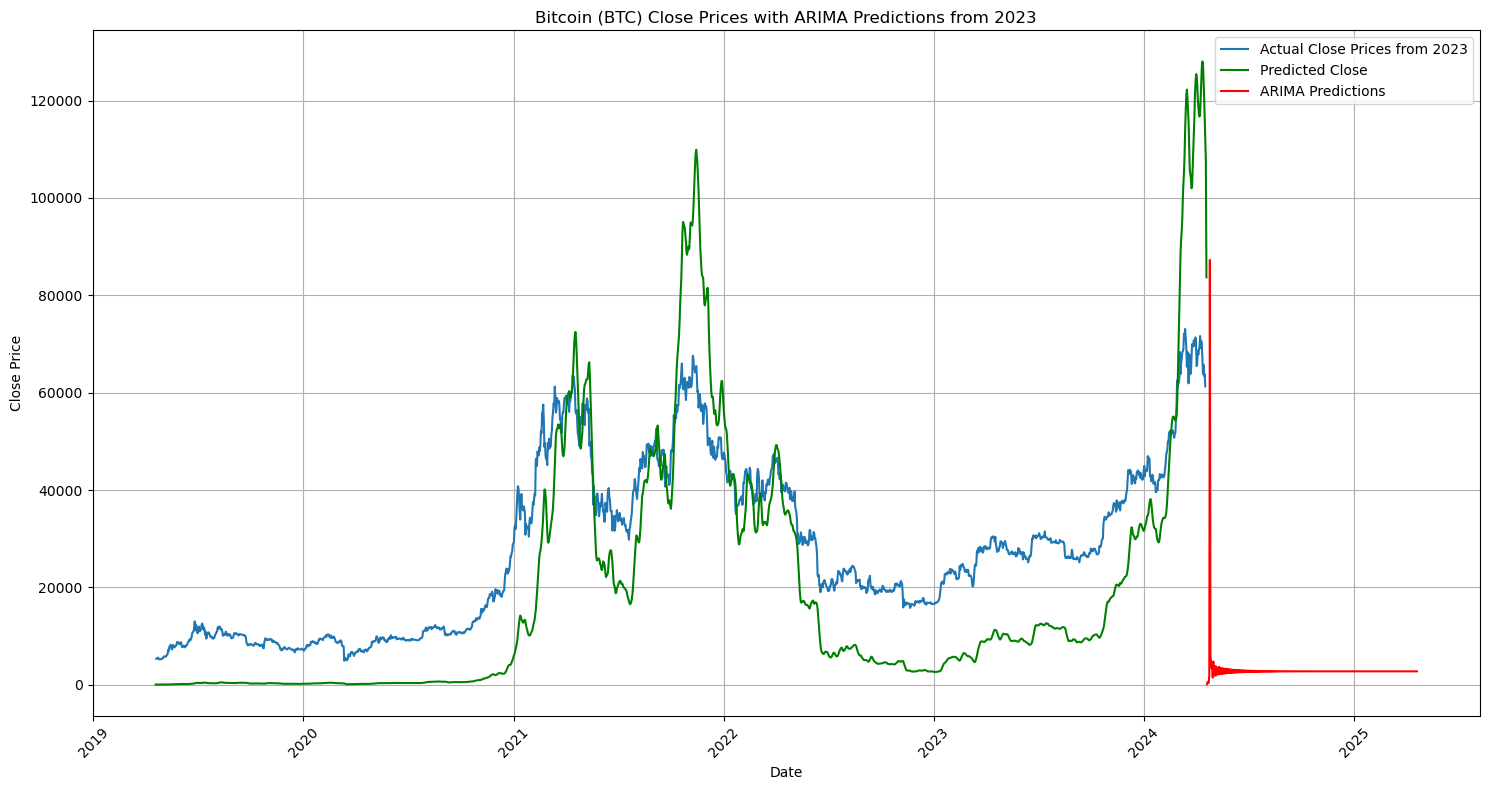

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/Users/rahulvispute/Desktop/SEM 3/623 final/BTC-USD.csv'
btc_data = pd.read_csv(file_path)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)  # Set 'Date' as the index

# Slice data from 2023 onwards
btc_data_2023_onwards = btc_data['2019-04-20':]

# Assuming 'forecast' is your pandas Series with the forecasted values and it is already indexed by date
# Example creation of 'forecast' Series (ensure your 'forecast' series is like this)
# forecast = pd.Series(data=[1.076551, 1.030969, 1.047474, ...], index=pd.date_range(start='2025-04-28', periods=366, freq='D'))

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(btc_data_2023_onwards['Close'], label='Actual Close Prices from 2023')# Plotting directly from DataFrame
plt.plot(predictions_ARIMA, label='Predicted Close',color='green') 
plt.plot(np.power(2653, forecast), label='ARIMA Predictions', color='red')  # Ensure 'forecast' is a Series indexed by dates
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin (BTC) Close Prices with ARIMA Predictions from 2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


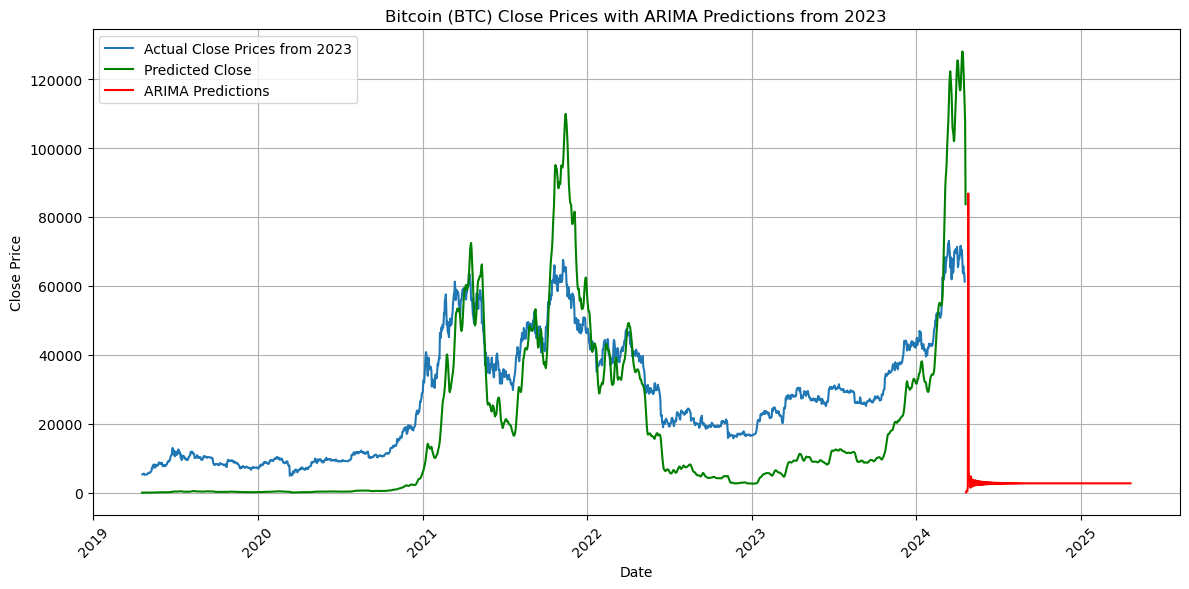

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/Users/rahulvispute/Desktop/SEM 3/623 final/BTC-USD.csv'
btc_data = pd.read_csv(file_path)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)  # Set 'Date' as the index

# Slice data from 2023 onwards
btc_data_2023_onwards = btc_data['2019-04-20':]

# Assuming 'forecast' is your pandas Series with the forecasted values and it is already indexed by date
# Example creation of 'forecast' Series (ensure your 'forecast' series is like this)
# forecast = pd.Series(data=[1.076551, 1.030969, 1.047474, ...], index=pd.date_range(start='2025-04-28', periods=366, freq='D'))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(btc_data_2023_onwards['Close'], label='Actual Close Prices from 2023')# Plotting directly from DataFrame
plt.plot(predictions_ARIMA, label='Predicted Close',color='green') 
plt.plot(np.power(2643, forecast), label='ARIMA Predictions', color='red')  # Ensure 'forecast' is a Series indexed by dates
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin (BTC) Close Prices with ARIMA Predictions from 2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Load the data
file_path = '/Users/rahulvispute/Desktop/SEM 3/623 final/BTC-USD.csv'  # Update the path as needed
btc_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and add new features
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data['Day_of_Week'] = btc_data['Date'].dt.dayofweek
btc_data['%Change_Open_Close'] = ((btc_data['Close'] - btc_data['Open']) / btc_data['Open']) * 100
btc_data['Daily_Range'] = btc_data['High'] - btc_data['Low']
btc_data.head(10)
from datetime import timedelta

# Generate future dates for the next 30 days
last_date = btc_data['Date'].iloc[-1]
future_dates_arima = [last_date + timedelta(days=x) for x in range(1, 31)]

# Initialize an empty DataFrame to store ARIMA predictions with the correct index
future_predictions_df = pd.DataFrame(index=future_dates_arima, columns=['Predictions'])

# Make predictions for the next 30 days using the ARIMA model
last_value_arima = btc_data['Close'].iloc[-1]  # Assuming 'Close' is the column containing the time series data
for i in range(30):
    next_arima_value = results_ARIMA.forecast(steps=1)[0]  # Adjust the steps as needed
    future_predictions_df.loc[future_dates_arima[i], 'Predictions'] = next_arima_value
    last_value_arima = next_arima_value

# Print the predictions for the next 30 days using the ARIMA model
print("ARIMA Model Predictions for the next 30 days:")
print(future_predictions_df)


ARIMA Model Predictions for the next 30 days:
           Predictions
2024-04-20    -0.47825
2024-04-21    -0.47825
2024-04-22    -0.47825
2024-04-23    -0.47825
2024-04-24    -0.47825
2024-04-25    -0.47825
2024-04-26    -0.47825
2024-04-27    -0.47825
2024-04-28    -0.47825
2024-04-29    -0.47825
2024-04-30    -0.47825
2024-05-01    -0.47825
2024-05-02    -0.47825
2024-05-03    -0.47825
2024-05-04    -0.47825
2024-05-05    -0.47825
2024-05-06    -0.47825
2024-05-07    -0.47825
2024-05-08    -0.47825
2024-05-09    -0.47825
2024-05-10    -0.47825
2024-05-11    -0.47825
2024-05-12    -0.47825
2024-05-13    -0.47825
2024-05-14    -0.47825
2024-05-15    -0.47825
2024-05-16    -0.47825
2024-05-17    -0.47825
2024-05-18    -0.47825
2024-05-19    -0.47825
